# Introduction to Data Provisioning
## What requirements does your data has to meet in order to be able to make a prediction (determine your target variable first) based on the dataset?
Om deze vraag te beantwoorden moet ik eerst een target variable bedenken. Dit zou ik moeten doen op basis van de dataset die ik wil gaan gebruiken. De dataset begrijpen is dus de eerste stap. De dataset die ik ga gebruiken is een dataset over de italiaanse wijnen die gemaakt zijn van drie verschillende soorten wijn. Hieruit wil ik halen of er een verbinding is tussen het alcohol percetage en de soort druif in de wijn. Hiervoor Heb ik eigenlijk alleen de soort druif nodig en he alcohol percentage. 

## How do you get your data? How is your data stored and is it accessible (also in the future)?
De dataset die ik op dit moment gebruikt komt van de  universiteit van Irving in de Verenigde staten. Deze instantie is volledig openbaar dus het is sowieso bereikbaar voor iedereen zolang diegene een internet verbinding heeft. Verder is deze site al online sinds 2015 en is dus al langere tijd online. Ook wordt er momenteel gewerkt aan een nieuwe site die nog in de beta zit. Hierdoor denk ik dat deze bron nog lang zal bestaan.

## Do you understand your data? Can you explain all the feature and instances (colummns and rows)? Can you visualize the charateristics of the data (also to others)?
Deze data laat zien wat de hoeveelheid is van de overeenkomende ingredienten in de wijnen. De data is verzameld op basis van drie verschillende soorten druiven waarvan de wijn gemaakt wordt in een bepaalde regio in Italië. 

Hieronder laat ik zien hoe ik uiteindelijk de verschillen in alcohol percentage in de wijnen van bepaalde soorten druiven heb kunnen weergeven.

In [1]:
import pandas
import csv
columns = ["Grape","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensisty","Hue","OD280/OD315 of diluted wines","Proline"]
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pandas.read_csv(url, names=columns)

df.head()

,Grape,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensisty,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
group_info = df.groupby(["Grape"])["Grape"].count()
group_info

Grape
1    59
2    71
3    48
Name: Grape, dtype: int64

In [3]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df["Grape ID"] = encoder.fit_transform(df["Grape"])
df.sample(10)

,Grape,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensisty,Hue,OD280/OD315 of diluted wines,Proline,Grape ID
106,2,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510,1
117,2,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345,1
150,3,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500,2
83,2,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,1
50,1,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150,0
68,2,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,1
75,2,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428,1
78,2,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750,1


In [4]:
plot_data = df[['Grape','Alcohol']]
plot_data

,Grape,Alcohol
0,1,14.23
1,1,13.20
2,1,13.16
3,1,14.37
4,1,13.24
...,...,...
173,3,13.71
174,3,13.40
175,3,13.27
176,3,13.17


<function matplotlib.pyplot.show(close=None, block=None)>

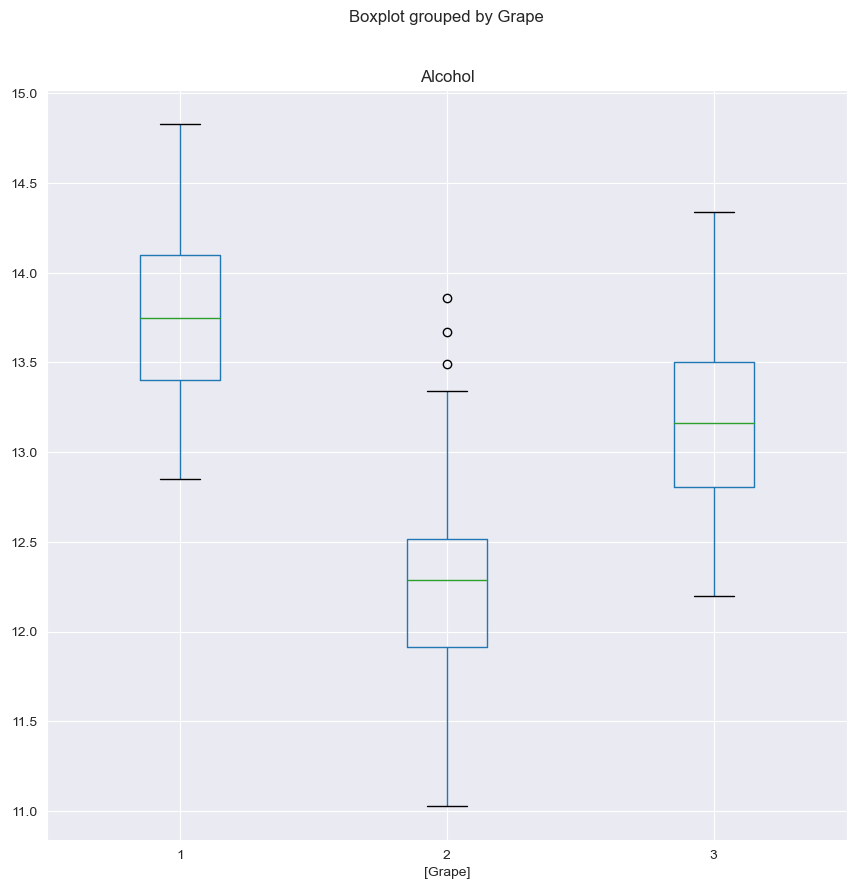

In [5]:
import matplotlib.pyplot as plt
plot_data.boxplot(by='Grape', grid=True, figsize=(10,10))
plt.show

## What transformations or preparations are needed to make sure the data(set) is ready to be 'fed into' a ML model?

Om deze data te verwerken zou je vooral moeten kijken naar data die belangrijk is om bij je target variable te komen. Dit komt doordat ik als target variable een feature wilde voorspellen met gelabelde data. Hiervoor hoeft er nog weinig gedaan te worden om de dataset klaar te maken voor een ML model.